#Misclassification of MNIST data and Relationship with Model uncertainity

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Filter for ones and zeros in training data
ones_zeros_train_mask = (y_train == 0) | (y_train == 1)
x_train_filtered = x_train[ones_zeros_train_mask]
y_train_filtered = y_train[ones_zeros_train_mask]

# Filter for ones and zeros in test data
ones_zeros_test_mask = (y_test == 0) | (y_test == 1)
x_test_filtered = x_test[ones_zeros_test_mask]
y_test_filtered = y_test[ones_zeros_test_mask]

# Save the filtered dataset as numpy arrays
np.savez("mnist_ones_zeros.npz",
         x_train=x_train_filtered, y_train=y_train_filtered,
         x_test=x_test_filtered, y_test=y_test_filtered)

print(f"Filtered training data shape: {x_train_filtered.shape}, Labels: {y_train_filtered.shape}")
print(f"Filtered test data shape: {x_test_filtered.shape}, Labels: {y_test_filtered.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Filtered training data shape: (12665, 28, 28), Labels: (12665,)
Filtered test data shape: (2115, 28, 28), Labels: (2115,)


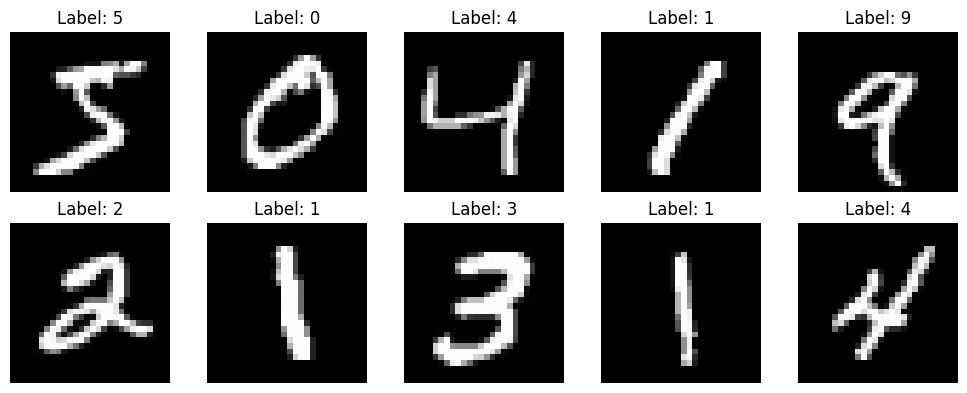

In [ ]:
import matplotlib.pyplot as plt

# Visualize some ones and zeros from the filtered training data
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

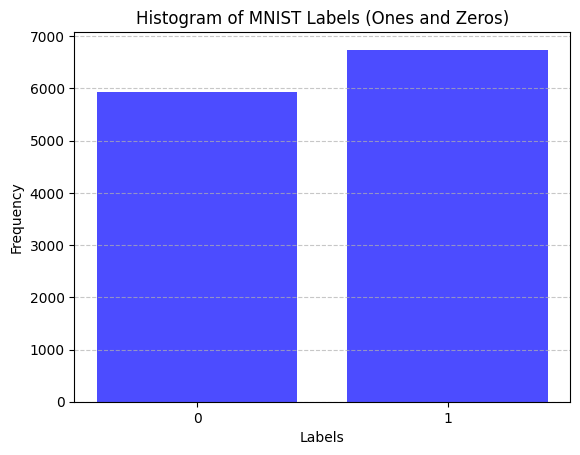

In [ ]:
# Plot histogram for filtered training labels
plt.hist(y_train_filtered, bins=np.arange(-0.5, 2, 1), rwidth=0.8, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Histogram of MNIST Labels (Ones and Zeros)")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks([0, 1])  # Set x-axis ticks for 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train_filtered, num_classes=2)
y_test_one_hot = to_categorical(y_test_filtered, num_classes=2)

print(f"Original labels: {y_train_filtered[:5]}")
print(f"One-hot encoded labels:\n{y_train_one_hot[:5]}")

Original labels: [0 1 1 1 1]
One-hot encoded labels:
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape input data to have a channel dimension (28x28x1)
x_train_reshaped = x_train_filtered.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_filtered.reshape(-1, 28, 28, 1)

# Define the CNN model
def cnn_model():
    model = Sequential([
        # Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        # MaxPooling layer to reduce the spatial dimensions
        MaxPooling2D(pool_size=(2, 2)),

        # Second convolutional layer
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten the output to feed into fully connected layers
        Flatten(),

        # Fully connected (dense) layer with 128 units and ReLU activation
        Dense(128, activation='relu'),

        # Dropout layer to prevent overfitting
        Dropout(0.5),

        # Output layer with 2 neurons (for classes 0 and 1) and softmax activation
        Dense(2, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the CNN model
model0 = cnn_model()
model1 = cnn_model()
model2 = cnn_model()
model3 = cnn_model()
model4 = cnn_model()
model5 = cnn_model()
model6 = cnn_model()
model7 = cnn_model()
model8 = cnn_model()
model9 = cnn_model()

models = [
    model0,
    model1,
    model2,
    model3,
    model4,
    model5,
    model6,
    model7,
    model8,
    model9
]

# Model summary to check the layers
for model in models:
    model.summary()

    # Train the model
    history = model.fit(x_train_reshaped, y_train_one_hot, epochs=10, batch_size=64, validation_data=(x_test_reshaped, y_test_one_hot))

    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test_reshaped, y_test_one_hot, verbose=2)
    print(f"Test accuracy: {test_acc}")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.9752 - loss: 0.7324 - val_accuracy: 0.9986 - val_loss: 0.0311
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9980 - loss: 0.0203 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9996 - loss: 0.0038 - val_accuracy: 0.9991 - val_loss: 0.0122
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9991 - val_loss: 0.0068
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 1.0000 - loss: 2.1551e-04 - val_accuracy: 0.9991 - val_loss: 0.0081
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9997 - loss: 7.0601e-04 - val_accuracy: 1.0000 - val_loss: 8.6401e-05
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9988 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 3.1717e-05
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 24s 83ms/step - accuracy: 0.9993 -

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.9645 - loss: 1.8246 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.9990 - loss: 0.0108 - val_accuracy: 0.9986 - val_loss: 0.0366
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.9981 - loss: 0.0197 - val_accuracy: 0.9995 - val_loss: 0.0113
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.9989 - loss: 0.0069 - val_accuracy: 0.9986 - val_loss: 0.0204
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.9979 - loss: 0.0116 - val_accuracy: 0.9991 - val_loss: 0.0079
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9981 - val_loss: 0.0096
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9996 - loss: 9.2222e-04 - val_accuracy: 0.9995 - val_loss: 0.0092
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9996 - loss: 0.00

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9573 - loss: 1.7082 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9982 - loss: 0.0272 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9986 - val_loss: 0.0039
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9989 - loss: 0.0070 - val_accuracy: 0.9991 - val_loss: 0.0034
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.9998 - loss: 4.9452e-04 - val_accuracy: 1.0000 - val_loss: 5.9500e-04
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9995 - val_loss: 7.5515e-04
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9997 - lo

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.9729 - loss: 1.0412 - val_accuracy: 0.9995 - val_loss: 0.0134
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9993 - loss: 0.0237 - val_accuracy: 0.9995 - val_loss: 0.0071
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9991 - loss: 0.0062 - val_accuracy: 0.9995 - val_loss: 0.0080
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 1.9186e-05
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9994 - loss: 0.0048 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9991 - val_loss: 0.0032
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.9998 - loss: 4.4877e-04 - val_accuracy: 0.9995 - val_loss: 0.0073
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.9996 - loss: 

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.9680 - loss: 1.0846 - val_accuracy: 0.9991 - val_loss: 0.0172
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9990 - loss: 0.0095 - val_accuracy: 0.9991 - val_loss: 0.0066
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9991 - loss: 0.0122 - val_accuracy: 0.9986 - val_loss: 0.0150
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9991 - loss: 0.0062 - val_accuracy: 0.9976 - val_loss: 0.0067
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 24s 83ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9991 - val_loss: 0.0033
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9986 - loss: 0.0090 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9991 - val_loss: 0.0054
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9988 - loss: 0.0045 - 

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.9710 - loss: 0.9633 - val_accuracy: 0.9986 - val_loss: 0.0129
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9982 - loss: 0.0148 - val_accuracy: 0.9991 - val_loss: 0.0080
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.9990 - loss: 0.0081 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9991 - val_loss: 0.0030
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.9988 - loss: 0.0068 - val_accuracy: 0.9991 - val_loss: 0.0037
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9989 - loss: 0.0048 -

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9726 - loss: 0.7363 - val_accuracy: 0.9986 - val_loss: 0.0120
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9983 - loss: 0.0211 - val_accuracy: 0.9986 - val_loss: 0.0178
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.9987 - loss: 0.0063 - val_accuracy: 0.9991 - val_loss: 0.0059
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.9991 - loss: 0.0018 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 1.0000 - loss: 9.2834e-05 - val_accuracy: 0.9995 - val_loss: 0.0031
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9999 - loss: 2.3914e-04 - val_accuracy: 0.9991 - val_loss: 0.0068
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.9998 - loss: 0

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.9685 - loss: 1.3273 - val_accuracy: 0.9995 - val_loss: 3.4220e-04
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9975 - loss: 0.0278 - val_accuracy: 0.9991 - val_loss: 0.0058
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9988 - loss: 0.0056 - val_accuracy: 0.9986 - val_loss: 0.0164
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9987 - loss: 0.0084 - val_accuracy: 0.9991 - val_loss: 0.0062
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9990 - loss: 0.0112 - val_accuracy: 0.9991 - val_loss: 0.0015
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.9991 - loss: 0.0052 - val_accuracy: 0.9991 - val_loss: 0.0075
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9989 - loss: 0.005

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.9652 - loss: 1.8531 - val_accuracy: 0.9986 - val_loss: 0.0246
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9992 - loss: 0.0137 - val_accuracy: 0.9991 - val_loss: 0.0070
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.9989 - loss: 0.0139 - val_accuracy: 0.9995 - val_loss: 0.0013
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9987 - loss: 0.0056 - val_accuracy: 0.9986 - val_loss: 0.0115
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9990 - loss: 0.0043 - val_accuracy: 0.9991 - val_loss: 0.0113
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9986 - val_loss: 0.0143
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9990 - loss: 0.0072 - val_accuracy: 1.0000 - val_loss: 3.3224e-04
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.9996 - loss: 0.002

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.9708 - loss: 0.8958 - val_accuracy: 0.9991 - val_loss: 0.0144
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.9979 - loss: 0.0176 - val_accuracy: 0.9995 - val_loss: 5.7411e-04
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.9985 - loss: 0.0076 - val_accuracy: 0.9991 - val_loss: 0.0046
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9995 - val_loss: 0.0049
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9994 - loss: 0.0013 - val_accuracy: 0.9995 - val_loss: 0.0060
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9989 - loss: 0.0069 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9999 - loss: 7.683

67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
67/67 - 1s - 9ms/step - accuracy: 0.9995 - loss: 0.0071
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
67/67 - 1s - 9ms/step - accuracy: 0.9986 - loss: 0.0197
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
67/67 - 1s - 9ms/step - accuracy: 0.9991 - loss: 0.0019
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
67/67 - 1s - 9ms/step - accuracy: 0.9995 - loss: 0.0017
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
67/67 - 1s - 8ms/step - accuracy: 0.9995 - loss: 0.0115
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
67/67 - 1s - 9ms/step - accuracy: 0.9991 - loss: 0.0018
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
67/67 - 1s - 15ms/step - accuracy: 0.9976 - loss: 0.0136
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
67/67 - 1s - 12ms/step - accuracy: 0.9995 - loss: 6.1804e-04
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
67/67 - 1s - 9ms/step - accuracy: 0.9995 - loss: 0.0018
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
67/67 - 1s - 9ms/step - accuracy: 0.9991 - loss: 0.0017


(array([1.13e+03, 0.00e+00, 1.00e+00, 3.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 9.77e+02]),
 array([4.21672220e-25, 3.33333333e-01, 6.66666667e-01, 1.00000000e+00,
        1.33333333e+00, 1.66666667e+00, 2.00000000e+00, 2.33333333e+00,
        2.66666667e+00, 3.00000000e+00, 3.33333333e+00, 3.66666667e+00,
        4.00000000e+00, 4.33333333e+00, 4.66666667e+00, 5.00000000e+00,
        5.33333333e+00, 5.66666667e+00, 6.00000000e+00, 6.33333333e+00,
        6.66666667e+00, 7.00000000e+00, 7.33333333e+00, 7.66666667e+00,
        8.00000000e+00, 8.33333333e+00, 8.66666667e+00, 9.00000000e+00,
        9.33333333e+00, 9.66666667e+00, 1.00000000e+01]),
 <BarContainer object of 30 artists>)

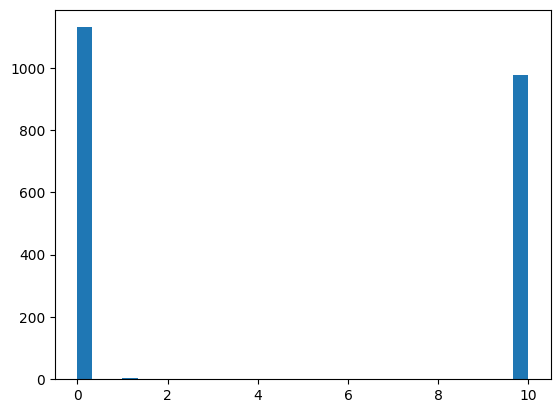

In [ ]:
#computing prediction error for the Test Samples
Y = np.zeros((10,len(x_test_reshaped)))
Acc = np.zeros(10)
i = 0
for model in models:
  y_cap = model.predict(x_test_reshaped)

  # print(y_cap.shape)
  # np.sum(y_cap, axis=1)
  Y[i] = y_cap[:,0]/np.sum(y_cap, axis=1)
  test_loss, test_acc = model.evaluate(x_test_reshaped, y_test_one_hot, verbose=2)
  Acc[i] = test_acc
  i = i+1

plt.hist(np.sum(Y, axis=0),bins=30)
#mostly all the poits are classified consistently!

In [ ]:
M = np.argmin(Acc)
print(M)

y_pred = models[M].predict(x_test_reshaped)
print(y_pred)

6
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[[3.7787591e-29 9.9999994e-01]
 [9.9999994e-01 0.0000000e+00]
 [3.2875364e-25 9.9999994e-01]
 ...
 [2.6437443e-27 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.9638372e-22 1.0000000e+00]]


In [ ]:
y_pred_train = models[M].predict(x_train_reshaped)
print(y_pred_train)

396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
[[9.9999994e-01 0.0000000e+00]
 [1.5817448e-26 9.9999994e-01]
 [3.0409556e-36 9.9999994e-01]
 ...
 [2.8400879e-29 9.9999994e-01]
 [9.9999994e-01 0.0000000e+00]
 [8.6615054e-25 1.0000000e+00]]


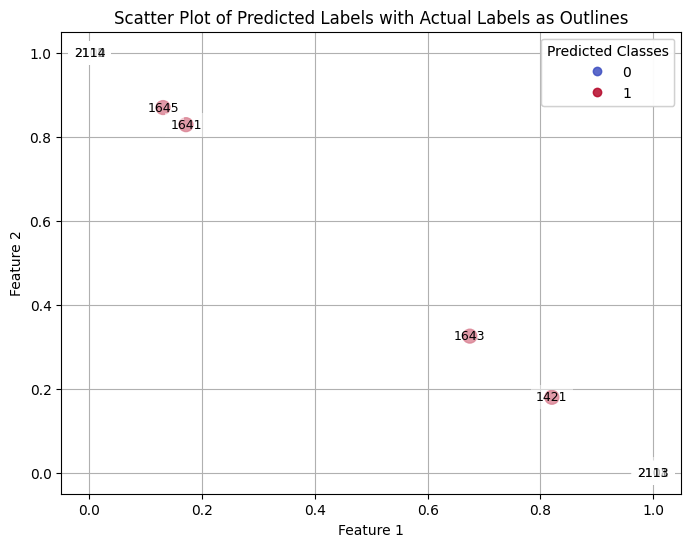

In [ ]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot of predicted labels (inner fill color)
scatter = plt.scatter(y_pred[:, 0], y_pred[:, 1], c=y_test_filtered, cmap="coolwarm", s=100, alpha=0.8, label="Predicted")

for i, (x, y) in enumerate(zip(y_pred[:, 0], y_pred[:, 1])):
    plt.text(x, y, str(i), fontsize=9, ha="center", va="center", color="black", bbox=dict(facecolor="white", alpha=0.5, edgecolor="none"))


# Add a legend for predicted labels
legend1 = plt.legend(*scatter.legend_elements(), title="Predicted Classes")
plt.gca().add_artist(legend1)

# Add a separate legend for actual labels
# plt.legend(title="Actual Classes", loc="upper left")

plt.title("Scatter Plot of Predicted Labels with Actual Labels as Outlines")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [ ]:
#find the y_pred
min = 0.5
max = 0
for i in range(len(y_pred)):
  if(y_test_filtered[i] == np.argmax(y_pred[i])):
    diff = np.abs(y_pred[i,0] - 0.5)
    if(min>diff):
      min = diff
      mi = i
    if(max<diff):
      max = diff
      Mi = i

print(y_pred[mi])
print(y_pred[Mi])

[0.17128678 0.82871324]
[3.7787591e-29 9.9999994e-01]


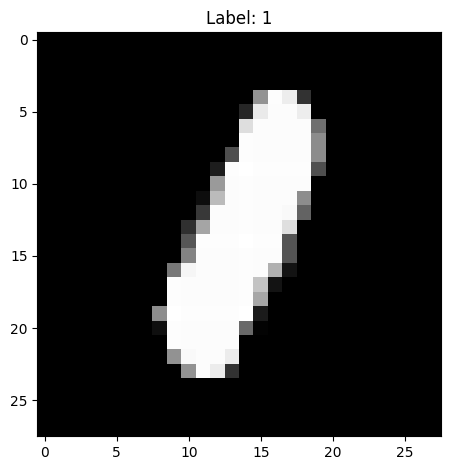

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
0.001
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.001
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.001
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.001
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.0


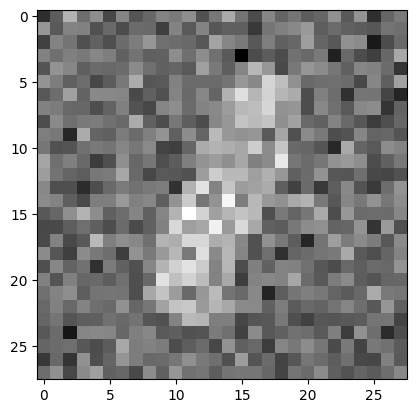

In [ ]:
N_noisy = 1000
X_noisy = np.zeros((N_noisy,28,28,1))
# P = np.zeros(x_test_reshaped.shape[0])
P=0

#minimum difference (Most likely to get perturbed by adding noise)

# for i in range(x_test_reshaped.shape[0]):
plt.imshow(x_test_reshaped[mi], cmap='gray')
plt.title(f"Label: {y_test_filtered[1641]}")
plt.tight_layout()
plt.show()


sigma = 100
k = 0

for i in range(10):
  # print(sigma)
  for j in range(N_noisy):
    # print(j,"of",N_noisy)
    X_noisy[j] = (x_test_reshaped[mi] + np.random.normal(0, sigma, x_test_reshaped[mi].shape))
  # with SuppressOutput():
  y_pred_one_hot = model.predict(X_noisy)
  y_pred = np.argmax(y_pred_one_hot, axis=1)

  # plt.imshow(X_noisy[j], cmap='gray')
  P=0
  for l in range(N_noisy):
    if (y_test_filtered[mi]!= y_pred[l]):
      plt.imshow(X_noisy[l], cmap='gray')
      # print("Successfully misclassified!")
      P = P + 1

  P = P/N_noisy

  print(P)

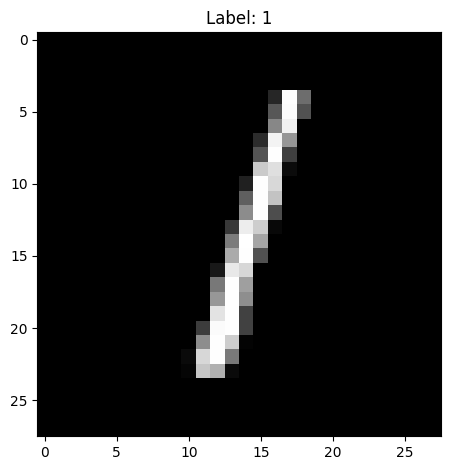

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
0.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0.0


In [ ]:
N_noisy = 1000
X_noisy = np.zeros((N_noisy,28,28,1))
# P = np.zeros(x_test_reshaped.shape[0])
P=0

#minimum difference (Most likely to get perturbed by adding noise)

# for i in range(x_test_reshaped.shape[0]):
plt.imshow(x_test_reshaped[Mi], cmap='gray')
plt.title(f"Label: {y_test_filtered[1641]}")
plt.tight_layout()
plt.show()


sigma = 100
k = 0

for i in range(10):
  # print(sigma)
  for j in range(N_noisy):
    # print(j,"of",N_noisy)
    X_noisy[j] = (x_test_reshaped[Mi] + np.random.normal(0, sigma, x_test_reshaped[Mi].shape))
  # with SuppressOutput():
  y_pred_one_hot = model.predict(X_noisy)
  y_pred = np.argmax(y_pred_one_hot, axis=1)

  # plt.imshow(X_noisy[j], cmap='gray')
  P=0
  for l in range(N_noisy):
    if (y_test_filtered[mi]!= y_pred[l]):
      plt.imshow(X_noisy[l], cmap='gray')
      # print("Successfully misclassified!")
      P = P + 1

  P = P/N_noisy

  print(P)

In [ ]:
X_min_max = np.zeros((2,28,28,1))
X_min_max[0] = x_test_reshaped[mi,:,:,:]
X_min_max[1] = x_test_reshaped[Mi,:,:,:]


X = np.zeros((10,2))
Y = np.zeros((10,2))

i = 0
for model in models:
  y_pred_one_hot = model.predict(X_min_max)
  X[i,0] = y_pred_one_hot[0,0]
  X[i,1] = y_pred_one_hot[1,0]
  Y[i,0] = y_pred_one_hot[0,1]
  Y[i,1] = y_pred_one_hot[1,1]
  # print(y_pred)
  i = i+1

muX = np.mean(X, axis=0)
muY = np.mean(Y, axis=0)

# X is prob(X)

# S = X - muX

std = np.std(X, axis=0)
print(std)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[5.13124794e-02 1.44771210e-13]


#Creating Adversarial Examples Given Model and Dataset



In [ ]:
from sklearn.datasets import make_blobs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

X, y = make_blobs(n_samples=500, n_features=2, centers=2,cluster_std=3.0, random_state=42)

X_train = X[:400,:]
y_train = y[:400]

X_test = X[400:500,:]
y_test = y[400:500]
# Print a few samples
print("Feature Shape:", X_train.shape)  # (300, 2)
print("First 5 Features:", X_train[:5],"Label:",y_train[:5])

y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

Feature Shape: (400, 2)
First 5 Features: [[-3.94672034  8.4573092 ]
 [-7.05477081 13.11490893]
 [-5.43324263 11.37553994]
 [-2.8929504   6.14766481]
 [ 1.79168217  9.87031588]] Label: [0 0 0 0 1]


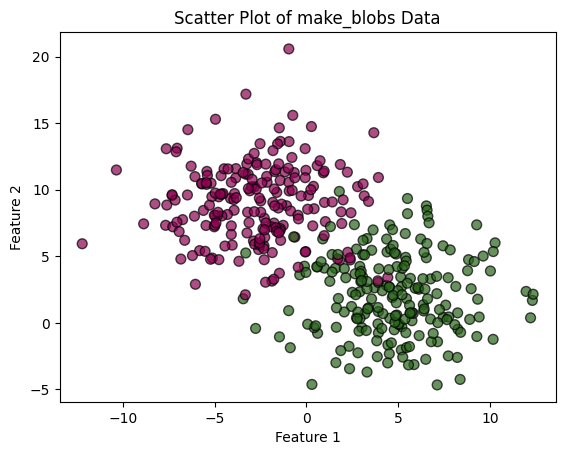

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='PiYG', s=50, alpha=0.7, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of make_blobs Data')
plt.show()

In [ ]:
print(X_test.shape)
print(X_train.shape)

(100, 2)
(400, 2)


In [ ]:
# Define the NN model
def nn_model():
    model = Sequential([
        Dense(120, input_dim=2, activation='relu'),

        # Optional additional hidden layers can be added (e.g., 4 neurons in the second hidden layer)
        Dense(60, activation='relu'),

        # Output layer with 2 neurons (for 2 classes) and softmax activation for classification
        Dense(2, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create the CNN model
model0 = nn_model()
model1 = nn_model()
model2 = nn_model()
model3 = nn_model()
model4 = nn_model()
model5 = nn_model()
model6 = nn_model()
model7 = nn_model()
model8 = nn_model()
model9 = nn_model()

models = [
    model0,
    model1,
    model2,
    model3,
    model4,
    model5,
    model6,
    model7,
    model8,
    model9
]
models[2].summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 120)                 │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 60)                  │           7,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 2)                   │             122 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,742 (30.24 KB)

 Trainable params: 7,742 (30.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for model in models:
    # model.summary()

    # Train the model
    model.fit(X_train, y_train_one_hot, epochs=10, batch_size=2,verbose=0,validation_data=(X_test, y_test_one_hot))

    # Example evaluation
    loss, accuracy = model.evaluate(X_test, y_test_one_hot)
    print(f"Model Loss: {loss}, Accuracy: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9048 - loss: 0.1896  
Model Loss: 0.2005617916584015, Accuracy: 0.8999999761581421
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9201 - loss: 0.2039  
Model Loss: 0.21110308170318604, Accuracy: 0.9200000166893005
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9295 - loss: 0.1889  
Model Loss: 0.20291490852832794, Accuracy: 0.9200000166893005
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9048 - loss: 0.2033  
Model Loss: 0.21730701625347137, Accuracy: 0.8999999761581421
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9202 - loss: 0.1966  
Model Loss: 0.21119771897792816, Accuracy: 0.9100000262260437
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9048 - loss: 0.2009  
Model Loss: 0.21330498158931732, Accuracy: 0.8999999761581421
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9201 - loss: 0.2138  
Model Loss: 0.22124190628528595, Accuracy: 0.9200000166893005
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9201 

In [ ]:
N_noisy = 10000
X_noisy = np.zeros((N_noisy,2))
P = np.zeros((5,X_test.shape[0]))

for i in range(X_test.shape[0]):
  print(i,"of",X_test.shape[0])
  sigma = 0.0001
  k = 0
  while(sigma<=1):
    print(sigma)
    for j in range(N_noisy):
      # print(j,"of",N_noisy)
      X_noisy[j] = (X_test[i] + np.random.normal(0, sigma, X_test[i].shape))
    # with SuppressOutput():
    y_pred_one_hot = model.predict(X_noisy)
    y_pred = np.argmax(y_pred_one_hot, axis=1)


    for l in range(N_noisy):
      if (y_test[i]!= y_pred[l]):
        P[k,i] = P[k,i] + 1
    P[k,i] = P[k,i]/N_noisy
    sigma = sigma*10
    k = k+1


# print(P)

0 of 100
0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.01
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.1
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1.0
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1 of 100
0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.01
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.1
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1.0
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2 of 100
0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.01
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.1
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1.0
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3 of 100
0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.001
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.01
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.1
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1.0
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
4 of 100
0.0001
313/313 ━━━━━━━━━━━━━━━━

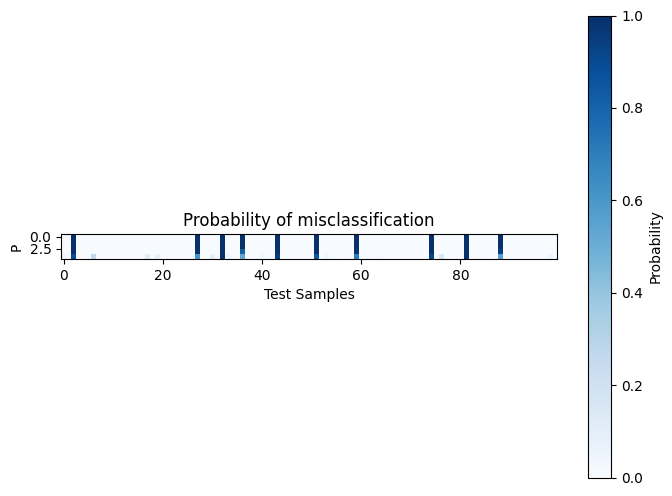

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(P, cmap='Blues')
plt.colorbar(label='Probability')
plt.xlabel('Test Samples')
plt.ylabel('P')
plt.title('Probability of misclassification')
plt.show()

In [ ]:
Ind = []
for i in range(X_test.shape[0]):
  if(P[0,i]>1/N_noisy):
    Ind.append(i)

print(Ind)

[2, 27, 32, 36, 43, 51, 59, 74, 81, 88]


In [ ]:

def fn_predict_ensemble(NNs, x_test):
	''' fn to predict given a list of NNs (an ensemble)'''
	y_logit_preds = []
	for m in range(len(NNs)):
		y_logit_preds.append(NNs[m].predict(x_test, verbose=0))
	y_logit_preds = np.array(y_logit_preds)


	y_prob_preds = tf.nn.softmax(y_logit_preds)


	y_prob_final = np.mean(y_prob_preds,axis=0)

	return y_logit_preds, y_prob_preds, y_prob_final

In [ ]:
def fn_plot(NNs,Ind, render='cartoon', title='',size_in=(6,3), plot_range=(30,30)):
	''' render is either full or cartoon '''

	# set nice colours
	col_lookup = {0:'deepskyblue',1:'salmon',2:'g',3:'w',4:'o'}
	color_in = []
	for i in range(y_train.shape[0]):
		for j in range(2):
			if y_train_one_hot[i,j] == 1:
				color_in.append(col_lookup[j])

	# make a grid to plot over
	x_range = plot_range[0]
	y_range = plot_range[0]
	x = np.linspace(-x_range,x_range,50+1)
	y = np.linspace(-y_range,y_range,50+1)
	x_grid_row,x_grid_col = np.meshgrid(x,y)
	x_grid = np.vstack([x_grid_row.ravel(), x_grid_col.ravel()]).T

	# do predictions over whole grid
	y_logit_preds, y_prob_preds, y_prob_final = fn_predict_ensemble(NNs,x_grid)
	y_prob_final_grid = y_prob_final[:,0].reshape(x_grid_row.shape)

	fig = plt.figure(figsize=size_in)
	ax = fig.add_subplot(111)

	# fix for the white lines between contour levels
	if render == 'cartoon':
		#cnt = ax.contourf(x_grid_row, x_grid_col, y_prob_final_grid,
        #                  levels=[0.,0.02,0.1,0.3,0.4,0.6,0.7,0.9,0.98,1.0], cmap='RdBu')
		cnt = ax.contourf(x_grid_row, x_grid_col, y_prob_final_grid, cmap='RdBu')
	elif render == 'full':
		cnt = ax.contourf(x_grid_row, x_grid_col, y_prob_final_grid, levels=500, cmap='RdBu')
	for c in cnt.collections:
		c.set_edgecolor("face")

	ax.scatter(X_train[:,0],X_train[:,1],c=color_in, s=50,linewidths=1,edgecolors='k')
	ax.scatter(X_test[Ind,0],X_test[Ind,1],s = 50, marker='x',color = 'y',linewidths=2)
	ax.set_title(title)
	fig.show()

	return

<ipython-input-43-2c6d0ba3b6f9>:34: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


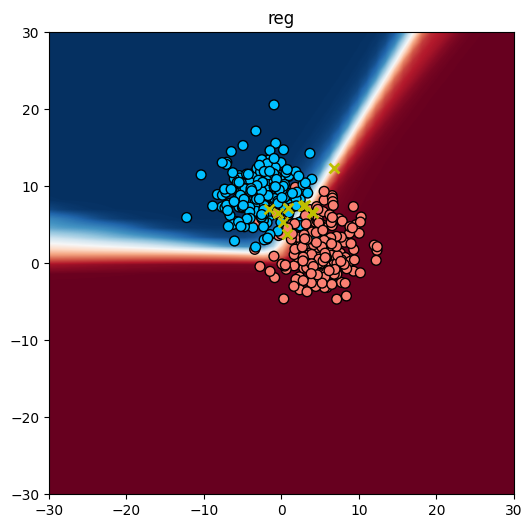

In [ ]:
fn_plot(models,Ind, render='full',title='reg',size_in=(6,6))